In [652]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['riverus-assignment', 'quora-insincere-questions-classification']


In [653]:
import csv
import pandas as pd
import collections
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.snowball import SnowballStemmer

**Data Analysis:**

In [654]:
df1 = pd.read_csv(r"../input/riverus-assignment/1.txt", sep="\t", header = None)
df2 = pd.read_csv(r"../input/riverus-assignment/2.txt", sep="\t", header = None)
test_df = pd.read_csv(r"../input/riverus-assignment/3.txt", sep=",", header = [0], index_col = 0)
testing_df = pd.read_csv(r"../input/riverus-assignment/3.txt", sep=",", header = [0], index_col = 0)
df2.columns = ['Target', 'Text'] 
df1.columns = ['Text', 'Target'] 
df2 = df2[['Text','Target']]
df = pd.concat([df1,df2], ignore_index = True)


In [655]:
df.describe()

,Target
count,7618.000000
mean,0.566159
std,0.495636
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [656]:
df.groupby('Target').describe()

Text                                  
       count unique                   top freq
Target                                        
0       3305    889  I hate Harry Potter.   85
1       4313   1100  I love Harry Potter.  167

In [657]:
df['length'] = df['Text'].apply(len)
df.head()

,Text,Target,length
0,"A very, very, very slow-moving, aimless movie ...",0,87
1,Not sure who was more lost - the flat characte...,0,99
2,Attempting artiness with black & white and cle...,0,188
3,Very little music or anything to speak of.,0,44
4,The best scene in the movie was when Gerardo i...,1,108


In [658]:
df.length.describe()

count    7618.000000
mean       66.323313
std       140.458789
min         7.000000
25%        32.000000
50%        49.000000
75%        78.000000
max      7944.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1bb5a9470>,
      dtype=object)

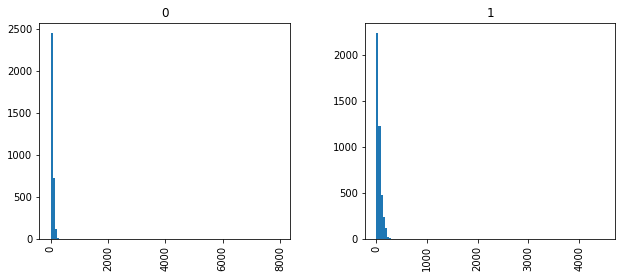

In [659]:
df.hist(column='length', by='Target', bins =110, figsize=(10,4))

**Preprocessing and Analysis:**

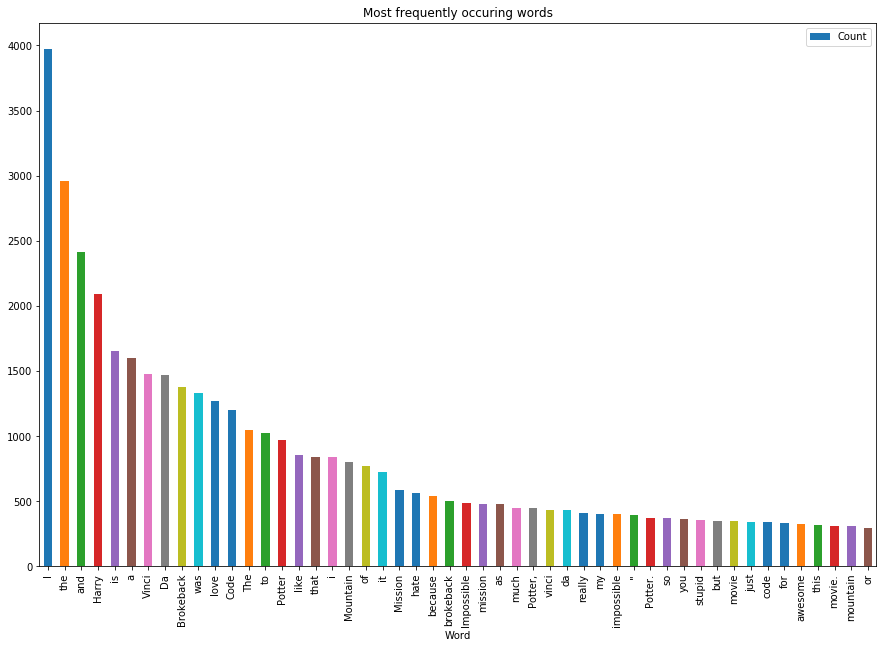

In [660]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()
freq = dict(freq)
len(freq)
# selectedKeys = list() 
# for (key, value) in freq.items() :
#     if value < 5:
#         selectedKeys.append(key)
word_counter = collections.Counter(freq)
# for word, count in word_counter.most_common():
#     print(word, ": ", count)

lst = word_counter.most_common(50)
df_bar = pd.DataFrame(lst, columns = ['Word', 'Count'])
df_bar.plot.bar(x='Word',y='Count', figsize = (15,10), title = 'Most frequently occuring words')


In [661]:
sw = stopwords.words('english')
# sw.extend(selectedKeys)
print(sw)

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_url(data):
#     emo = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     data = emo.sub(r'', data)
    if data.startswith('www.'):
        data = re.sub(r'www.', '', data)
    if data.startswith('http.'):
        data = re.sub(r'http.', '', data)
    domain = data.split("//")[-1].split("/")[0]
    return domain

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [662]:
df['Text'] = df['Text'].apply(stopwords)
df['Text'] = df['Text'].apply(remove_url)
df['Text'] = df['Text'].apply(remove_punctuation)
df['Text'] = df['Text'].apply(cleaner)
df['Text'] = df['Text'].apply(stopwords)
test_df['Text'] = test_df['Text'].apply(remove_url)
test_df['Text'] = test_df['Text'].apply(remove_punctuation)
test_df['Text'] = test_df['Text'].apply(cleaner)
test_df['Text'] = test_df['Text'].apply(stopwords)


In [663]:
df.groupby('Target').describe()

length                                                      
         count       mean         std  min   25%   50%   75%     max
Target                                                              
0       3305.0  71.481089  189.074499  8.0  37.0  49.0  84.0  7944.0
1       4313.0  62.370971   86.149801  7.0  31.0  46.0  78.0  4487.0

In [664]:
df['cleaned_length'] = df['Text'].apply(len)
df.head()

,Text,Target,length,cleaned_length
0,slowmoving aimless movie distressed drifting y...,0,87,54
1,sure lost flat characters audience nearly half...,0,99,53
2,attempting artiness black white clever camera ...,0,188,136
3,little music anything speak,0,44,27
4,best scene movie gerardo trying find song keep...,1,108,60


In [665]:
df.cleaned_length.describe()

count    7618.000000
mean       43.429378
std        44.768555
min         0.000000
25%        24.000000
50%        36.000000
75%        52.000000
max      2038.000000
Name: cleaned_length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1badd4438>,
      dtype=object)

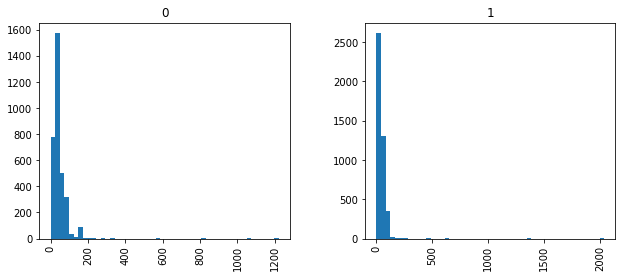

In [666]:
df.hist(column='cleaned_length', by='Target', bins =50, figsize=(10,4))

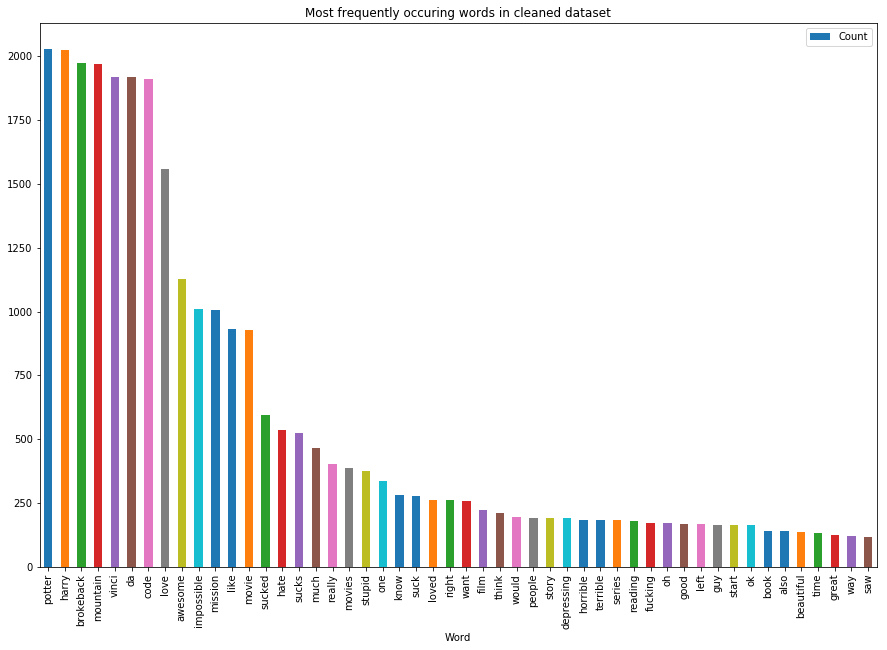

In [667]:
cleaned_freq = pd.Series(' '.join(df['Text']).split()).value_counts()
cleaned_freq = dict(cleaned_freq)
len(cleaned_freq)
cleaned_word_counter = collections.Counter(cleaned_freq)
# for word, count in word_counter.most_common():
#     print(word, ": ", count)

cleaned_lst = cleaned_word_counter.most_common(50)
df_bar = pd.DataFrame(cleaned_lst, columns = ['Word', 'Count'])
df_bar.plot.bar(x='Word',y='Count', figsize = (15,10), title = 'Most frequently occuring words in cleaned dataset')



In [668]:
df.drop(['length', 'cleaned_length'], axis = 1, inplace = True)

In [669]:
df = df.reindex(np.random.permutation(df.index))
df.head()

,Text,Target
418,even allowing poor production values time form...,0
2669,said silent hill turned reality coz hella like...,1
1589,love luv lubb da vinci code,1
5163,heard da vinci code sucked soo much stars,0
4438,man loved brokeback mountain,1


In [670]:
stemmer = SnowballStemmer("english")
def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
df['Text'] = df['Text'].apply(stemming)
test_df['Text'] = test_df['Text'].apply(stemming)

**Building the Model:**

In [671]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn


**TF-IDF Model:**

In [672]:
cv = TfidfVectorizer(ngram_range = (1,2))
X_df = cv.fit_transform(df.Text).toarray()
test_df_cv = cv.transform(test_df.Text).toarray()
Y_df = df.iloc[:,1].values

In [673]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.20, random_state = 10)

**Logistic Regression:**

In [674]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [675]:
import pickle

with open('lr_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [676]:
Y_pred = lr.predict(X_test)
target_names = ['0', '1']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       669
           1       0.97      0.99      0.98       855

   micro avg       0.98      0.98      0.98      1524
   macro avg       0.98      0.98      0.98      1524
weighted avg       0.98      0.98      0.98      1524



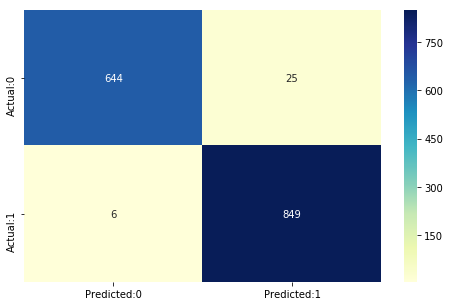

In [677]:
cm_lr = confusion_matrix(Y_test,Y_pred)
conf_matrix_lr = pd.DataFrame(data=cm_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix_lr, annot=True,fmt='d',cmap="YlGnBu")

**Random Forest:**

In [678]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 10)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [679]:
with open('rf_model.pickle', 'wb') as f:
    pickle.dump(rf, f)

In [680]:
Y_pred_rf = rf.predict(X_test)
target_names = ['0', '1']
print(classification_report(Y_test, Y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       669
           1       0.96      0.99      0.97       855

   micro avg       0.97      0.97      0.97      1524
   macro avg       0.97      0.97      0.97      1524
weighted avg       0.97      0.97      0.97      1524



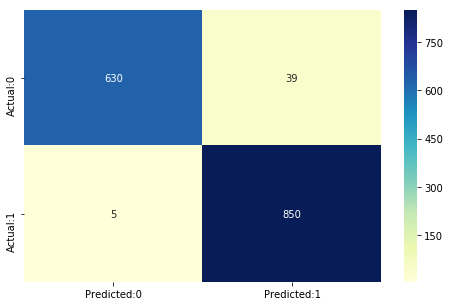

In [681]:
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
conf_matrix_rf = pd.DataFrame(data=cm_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix_rf, annot=True,fmt='d',cmap="YlGnBu")

**Testing:**

In [682]:
test_pred_rf = lr.predict(test_df_cv)
print(test_pred_rf)

[0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 

In [683]:
testing_df.head()

,index,Text,Prediction
0,0,I exchanged the sony ericson z500a for this an...,NaN
1,1,Oh and I forgot to also mention the weird colo...,NaN
2,2,Verizon tech support walked my through a few p...,NaN
3,3,Better than you'd expect.,NaN
4,4,This is a great little item.,NaN


In [684]:
submission = pd.DataFrame({'index':test_df['index'],'Text':testing_df['Text'],'Prediction':test_pred_rf})
submission.head(10)

,index,Text,Prediction
0,0,I exchanged the sony ericson z500a for this an...,0
1,1,Oh and I forgot to also mention the weird colo...,1
2,2,Verizon tech support walked my through a few p...,0
3,3,Better than you'd expect.,0
4,4,This is a great little item.,1
5,5,"Nice case, feels good in your hands.",1
6,6,Do not make the same mistake as me.,0
7,7,However I needed some better instructions.,0
8,8,Nice design and quality.,1
9,9,It was a waste of my money.,0


In [685]:
submission.to_csv('Predictions1.csv', index = False)